  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/ColorMNIST2/raw/train-images-idx3-ubyte.gz to ./data/ColorMNIST2/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/ColorMNIST2/raw/train-labels-idx1-ubyte.gz to ./data/ColorMNIST2/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/ColorMNIST2/raw/t10k-images-idx3-ubyte.gz to ./data/ColorMNIST2/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/ColorMNIST2/raw/t10k-labels-idx1-ubyte.gz to ./data/ColorMNIST2/raw



/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/ColorMNIST1/raw/train-images-idx3-ubyte.gz to ./data/ColorMNIST1/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/ColorMNIST1/raw/train-labels-idx1-ubyte.gz to ./data/ColorMNIST1/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/ColorMNIST1/raw/t10k-images-idx3-ubyte.gz to ./data/ColorMNIST1/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/ColorMNIST1/raw/t10k-labels-idx1-ubyte.gz to ./data/ColorMNIST1/raw



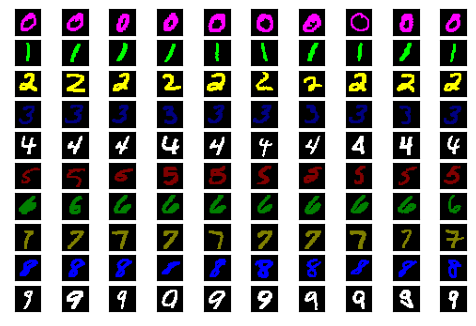

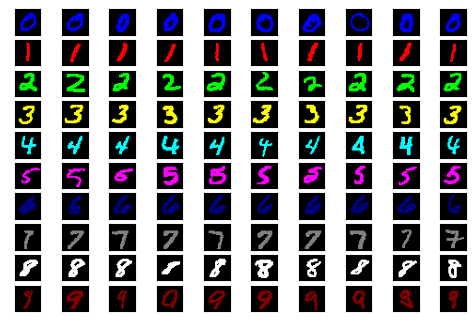

Epoch: 1 / 13
Avg discriminator A loss: 0.8418
Avg discriminator B loss: 1.5747
Avg generator AB loss: 8.0160
Avg generator BA loss: 7.5070


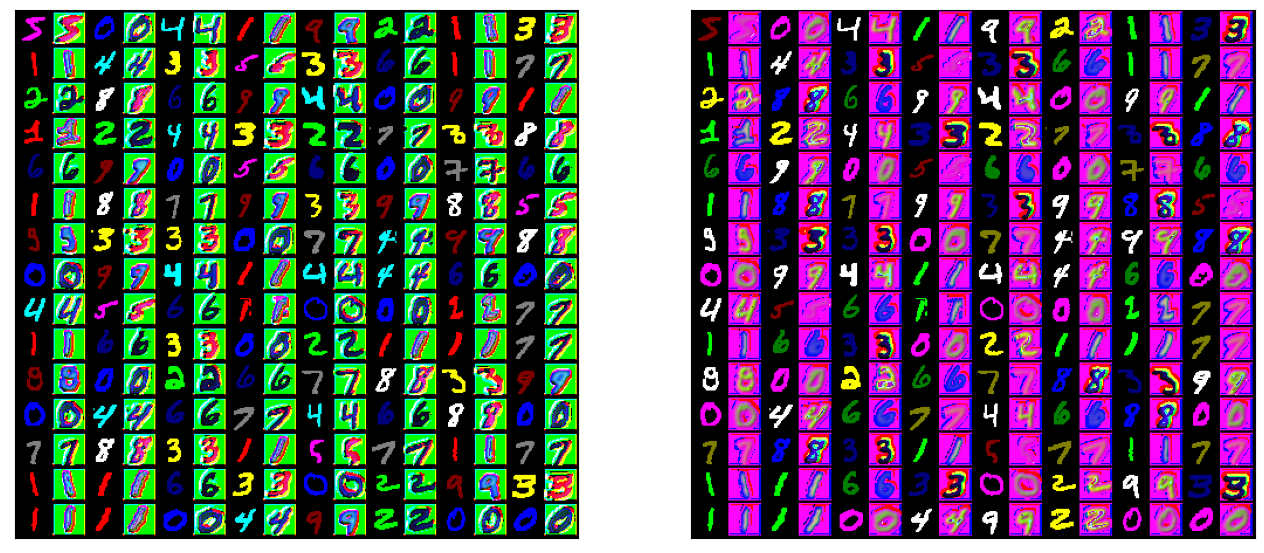

Epoch: 2 / 13
Avg discriminator A loss: 0.2780
Avg discriminator B loss: 0.3476
Avg generator AB loss: 3.9384
Avg generator BA loss: 4.2906


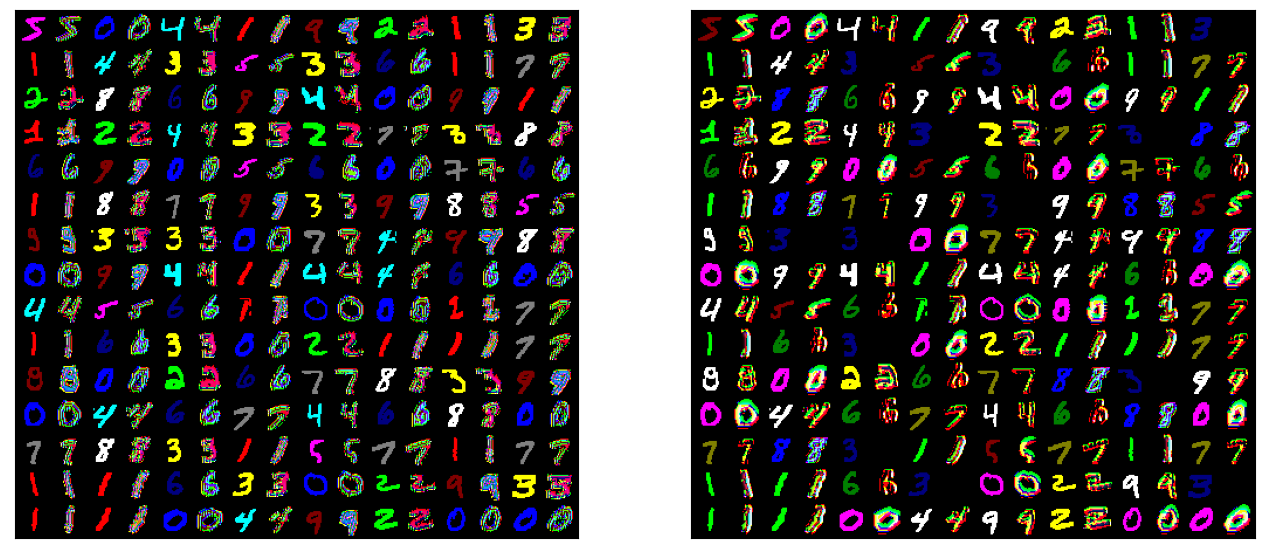

Epoch: 3 / 13
Avg discriminator A loss: 0.1261
Avg discriminator B loss: 0.3078
Avg generator AB loss: 4.7130
Avg generator BA loss: 6.3753


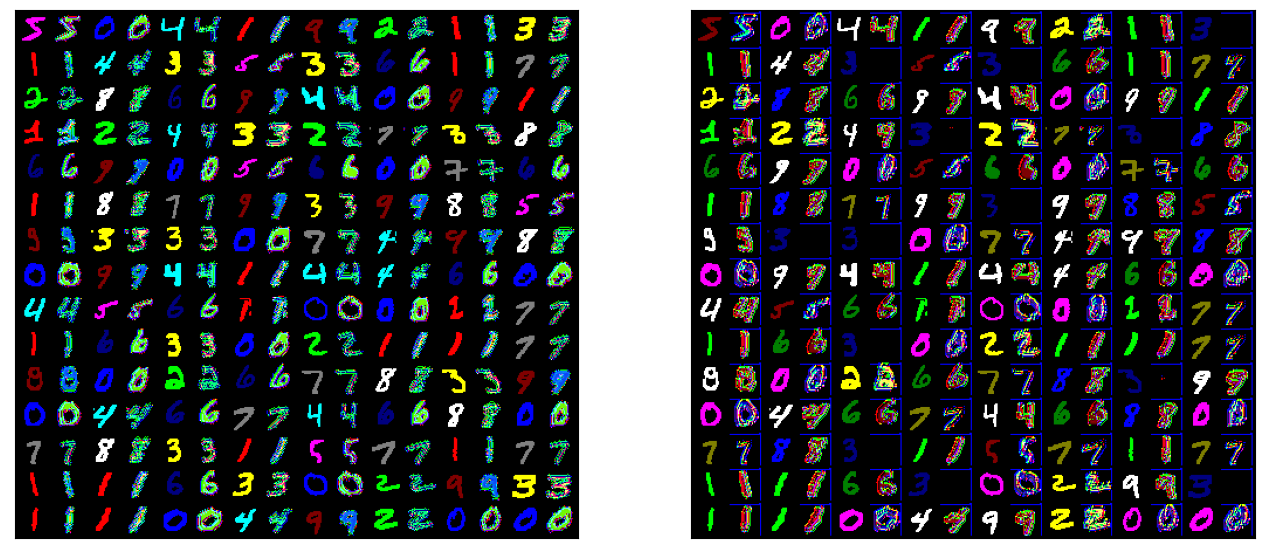

Epoch: 4 / 13
Avg discriminator A loss: 0.1557
Avg discriminator B loss: 0.3139
Avg generator AB loss: 4.4602
Avg generator BA loss: 6.3306


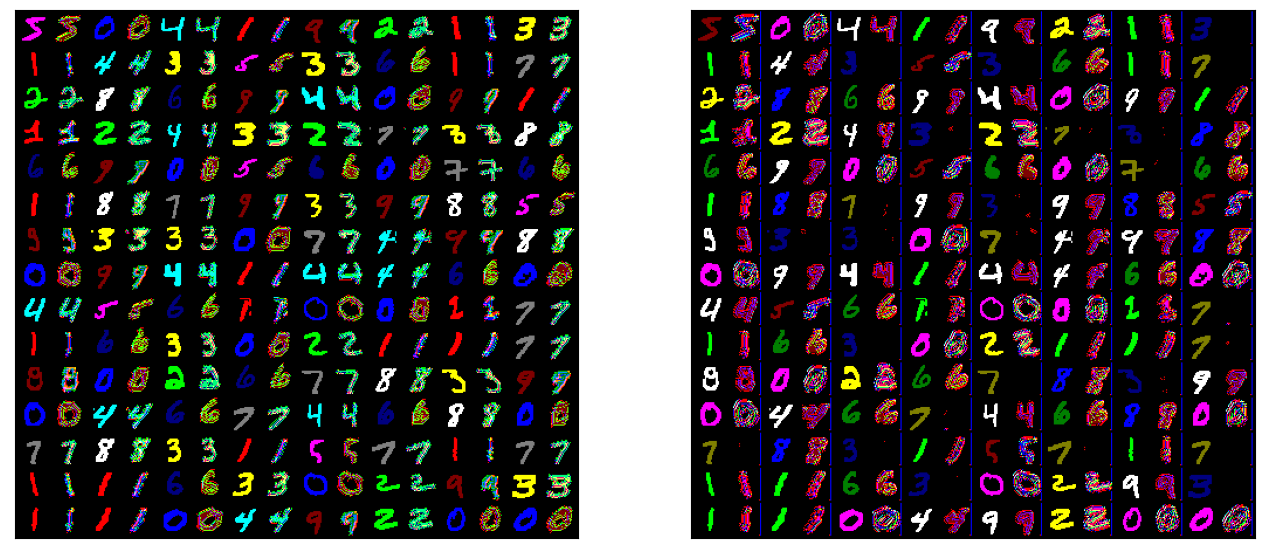

Epoch: 5 / 13
Avg discriminator A loss: 0.1210
Avg discriminator B loss: 0.3485
Avg generator AB loss: 4.5610
Avg generator BA loss: 7.1140


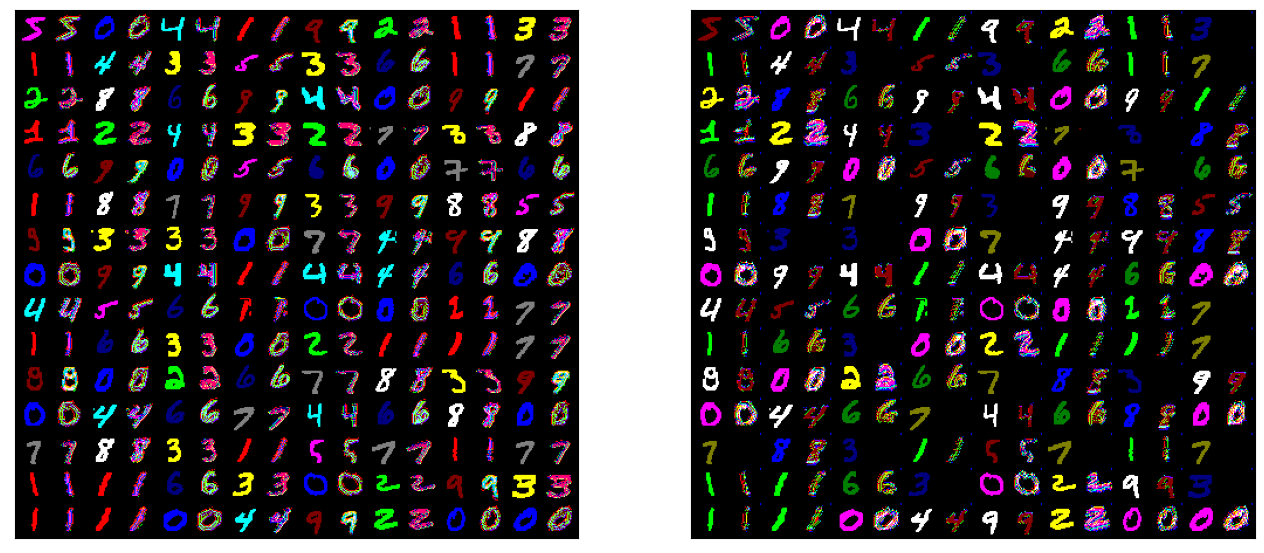

Epoch: 6 / 13
Avg discriminator A loss: 0.1658
Avg discriminator B loss: 0.3890
Avg generator AB loss: 4.4116
Avg generator BA loss: 6.9878


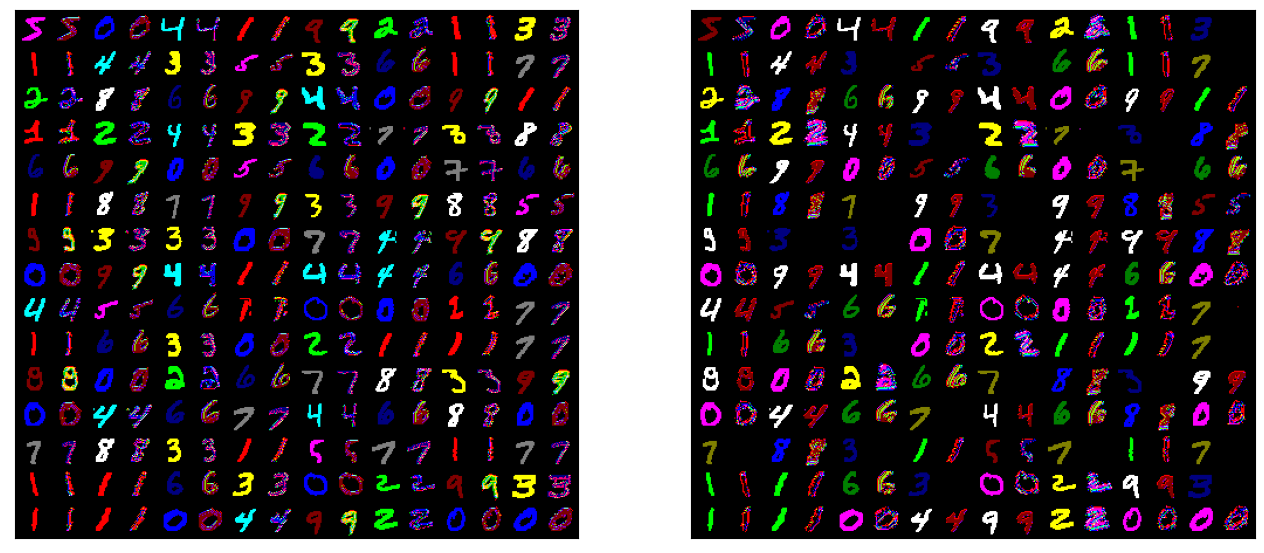

Epoch: 7 / 13
Avg discriminator A loss: 0.1434
Avg discriminator B loss: 0.3542
Avg generator AB loss: 4.8782
Avg generator BA loss: 7.1679


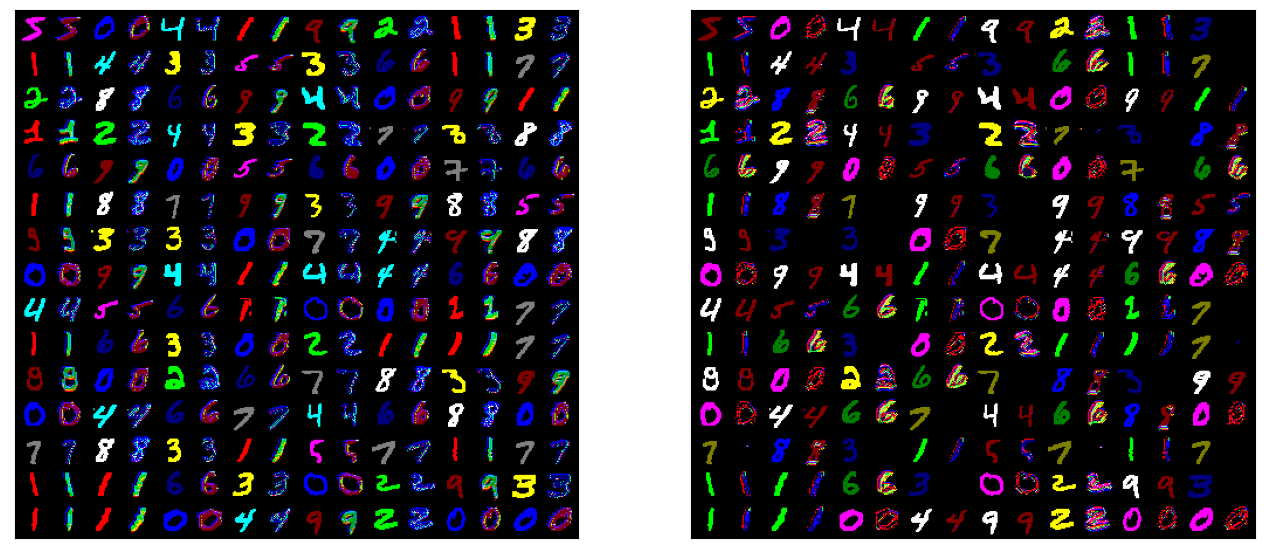

Epoch: 8 / 13
Avg discriminator A loss: 0.1140
Avg discriminator B loss: 0.3200
Avg generator AB loss: 5.1925
Avg generator BA loss: 8.1041


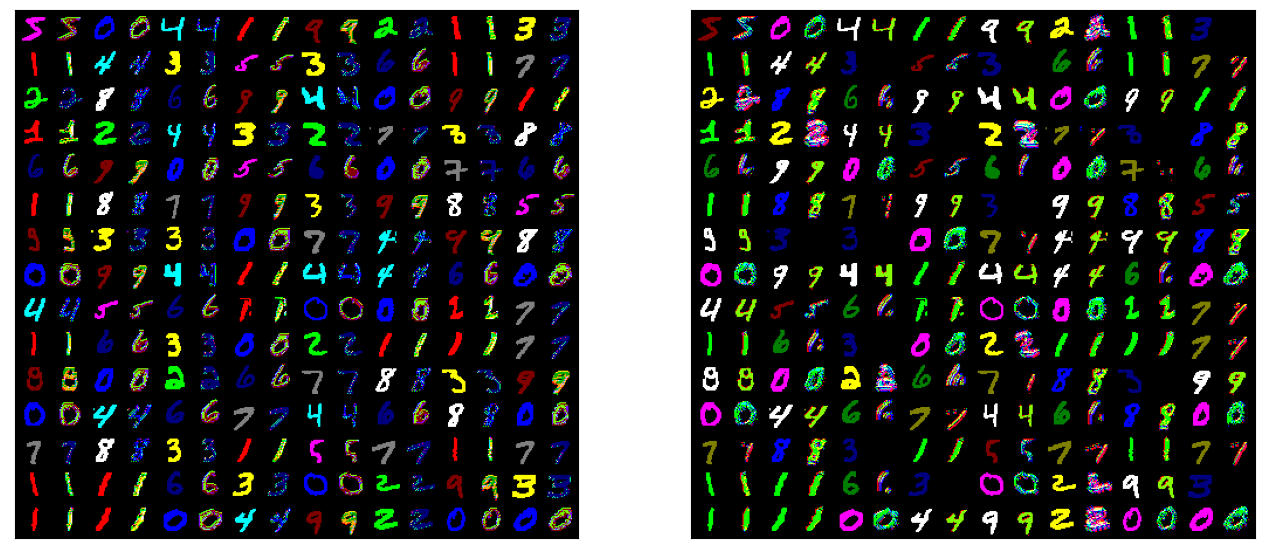

Epoch: 9 / 13
Avg discriminator A loss: 0.1126
Avg discriminator B loss: 0.2676
Avg generator AB loss: 5.9352
Avg generator BA loss: 8.6495


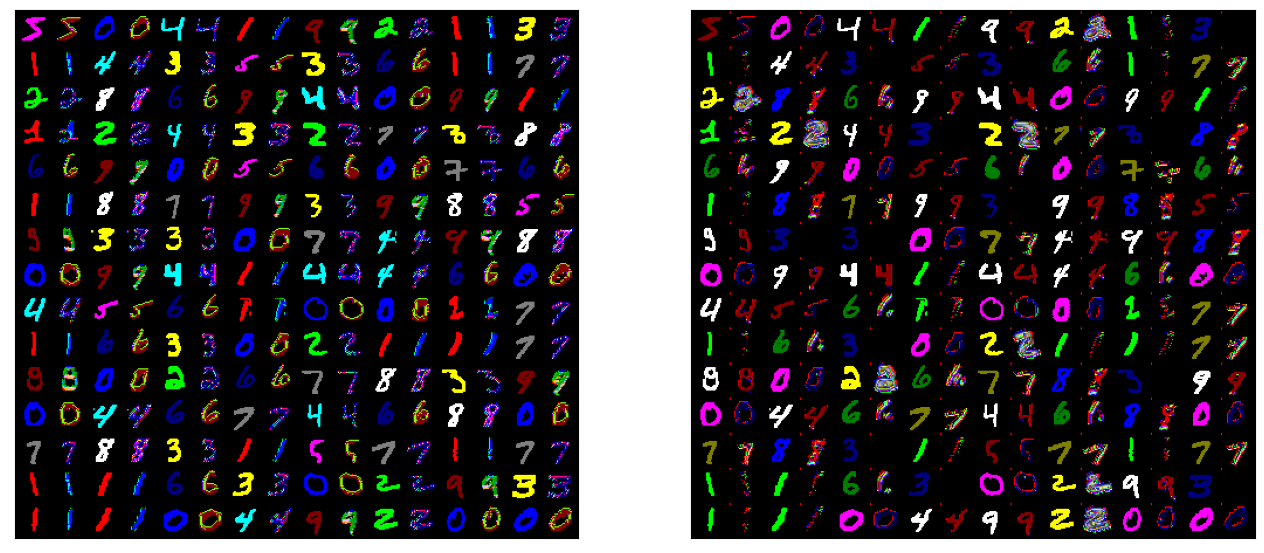

Epoch: 10 / 13
Avg discriminator A loss: 0.1099
Avg discriminator B loss: 0.3074
Avg generator AB loss: 5.1400
Avg generator BA loss: 8.5723


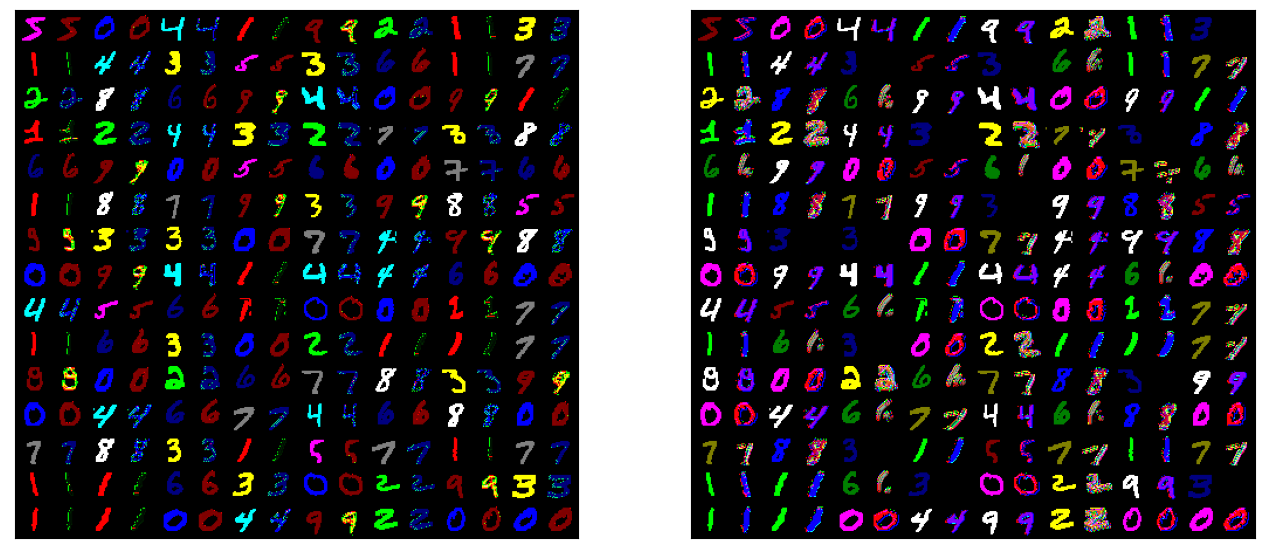

Epoch: 11 / 13
Avg discriminator A loss: 0.0933
Avg discriminator B loss: 0.2506
Avg generator AB loss: 7.5262
Avg generator BA loss: 8.9785


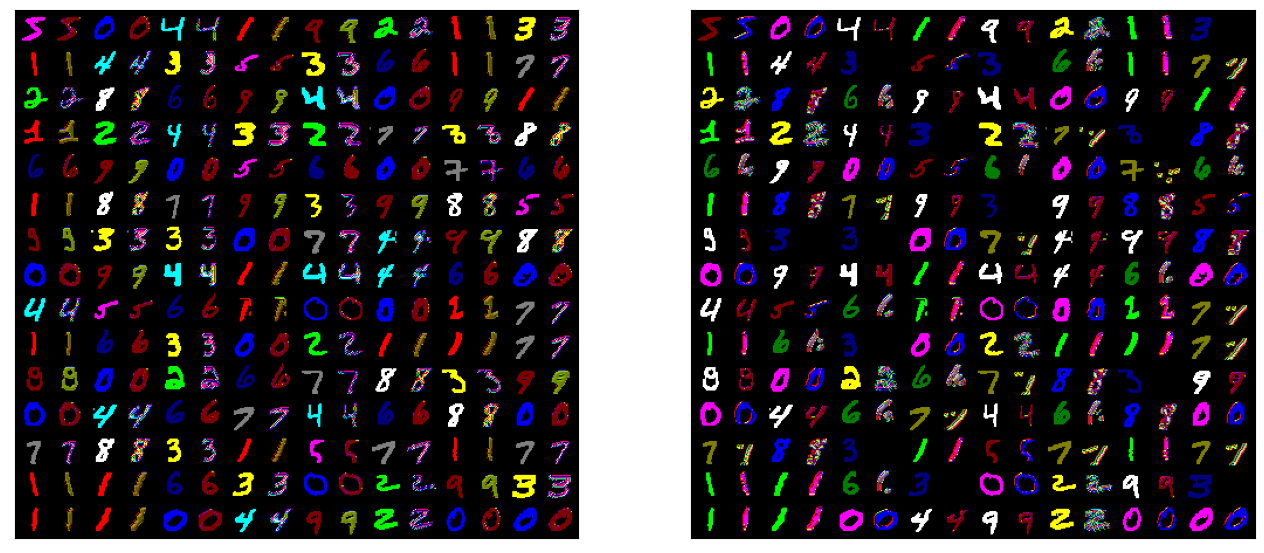

Epoch: 12 / 13
Avg discriminator A loss: 0.0174
Avg discriminator B loss: 0.2426
Avg generator AB loss: 6.4943
Avg generator BA loss: 51.3950


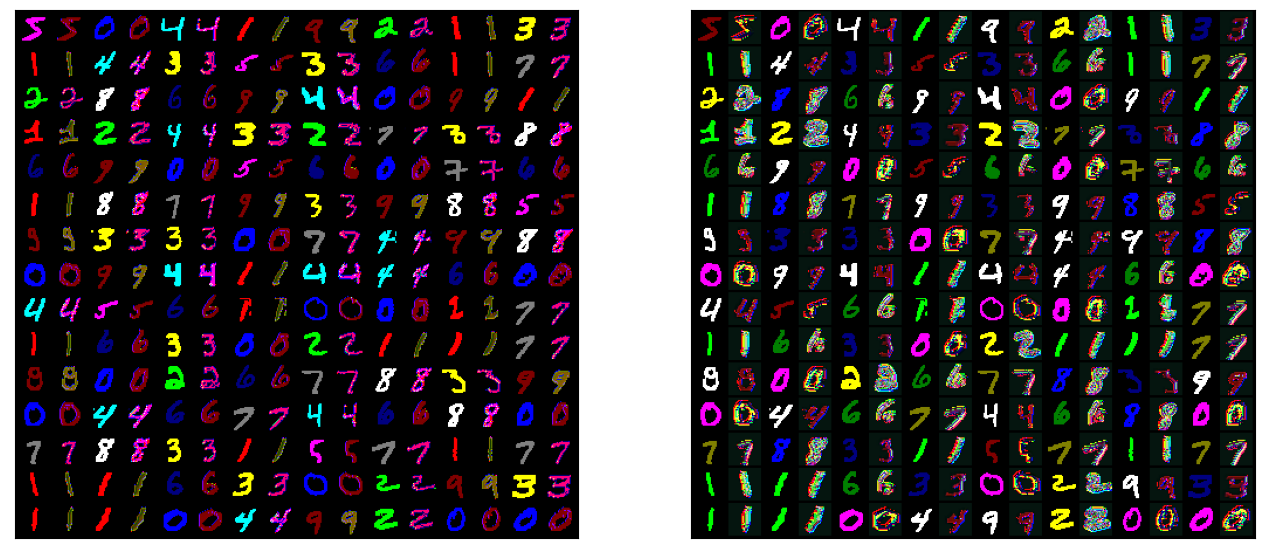

Epoch: 13 / 13
Avg discriminator A loss: 0.0002
Avg discriminator B loss: 0.1455
Avg generator AB loss: 10.4600
Avg generator BA loss: 97.4609


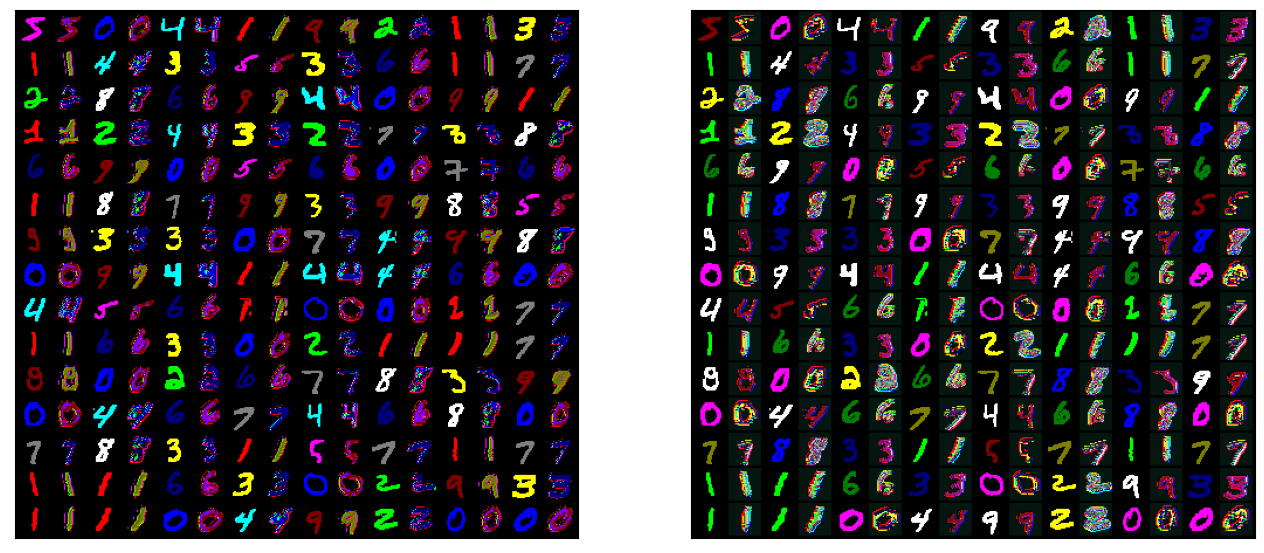

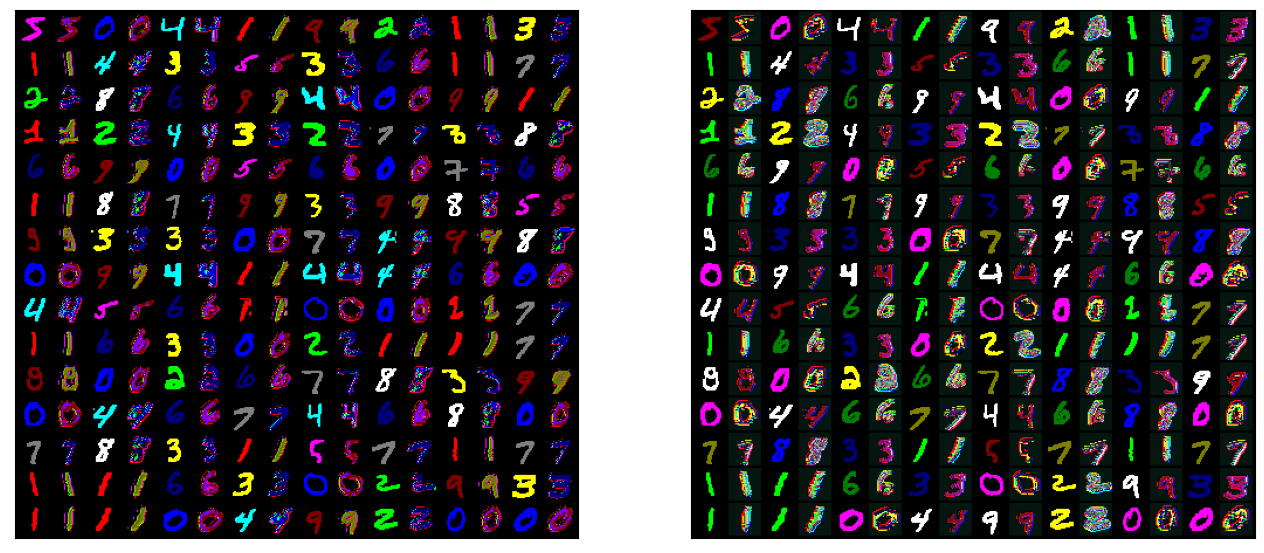

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import pickle
import random
import numpy as np
from torchvision.datasets import MNIST
from PIL import Image
import torchvision
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 100
import IPython
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class ColorMNIST1(MNIST):
    def __init__(self, root, train=True, download=False, transform=None, target_transform=None):
        super(ColorMNIST1, self).__init__(root, train=train, download=download, transform=transform, target_transform=target_transform)
        self.label_color_map = {}
        colors = [(0, 0, 255), (255, 0, 0), (0, 255, 0), (255, 255, 0), (0, 255, 255), (255, 0, 255), (0, 0, 128), (128, 128, 128), (255, 255, 255), (128, 0, 0)]
        for i in range(10):
          self.label_color_map[i] = colors[i]

    def __getitem__(self, index):
        image, right_label = self.data[index], self.targets[index]
        image = image.numpy()
        color = self.label_color_map[right_label.item()]
        image = np.stack((image, image, image), axis=2)
        image = np.where(image > 0, color, image)
        image = image.astype(np.uint8)
        image = Image.fromarray(image)
        if self.transform is not None:
            image = self.transform(image)

        if self.target_transform is not None:
            right_label = self.target_transform(right_label)

        return image, right_label

class ColorMNIST2(MNIST):
    def __init__(self, root, train=True, download=False, transform=None, target_transform=None):
        super(ColorMNIST2, self).__init__(root, train=train, download=download, transform=transform, target_transform=target_transform)

        self.label_color_map = {}
        colors =  [(255, 0, 255), (0, 255, 0), (255, 255, 0), (0, 0, 128), (255, 255, 255), (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 255), (255, 255, 255)]
        for i in range(10):
          self.label_color_map[i] = colors[i]

    def __getitem__(self, index):
        image, right_label = self.data[index], self.targets[index]
        image = image.numpy()
        color = self.label_color_map[right_label.item()]
        image = np.stack((image, image, image), axis=2)
        image = np.where(image > 0, color, image)
        image = image.astype(np.uint8)
        image = Image.fromarray(image)
        if self.transform is not None:
            image = self.transform(image)

        if self.target_transform is not None:
            right_label = self.target_transform(right_label)

        return image, right_label

transforms_set = transforms.Compose([transforms.Resize((28, 28)),transforms.ToTensor()])
color_mnist_setB_training = ColorMNIST2(root='./data', train=True, download=True, transform=transforms_set)
color_mnist_setB_testing = ColorMNIST2(root='./data', train=False, download=True)
training_data_set_B = torch.utils.data.DataLoader(dataset=color_mnist_setB_training, batch_size=120, num_workers = 4,pin_memory=True)
color_mnist_setA_training = ColorMNIST1(root='./data', train=True, download=True, transform=transforms_set)
color_mnist_setA_testing = ColorMNIST1(root='./data', train=False, download=True)
training_data_set_A = torch.utils.data.DataLoader(dataset=color_mnist_setA_training, batch_size=120, num_workers = 4, pin_memory=True)

for i in range(100):
    plt.subplot(10, 10, i + 1)
    subset_train = torch.utils.data.Subset(color_mnist_setB_training, np.where(color_mnist_setB_training.targets == i//10)[0])
    plt.imshow(subset_train[i][0].permute(1, 2, 0))
    plt.xticks([])
    plt.yticks([])
plt.show()

for i in range(100):
    plt.subplot(10, 10, i + 1)
    subset_train = torch.utils.data.Subset(color_mnist_setA_training, np.where(color_mnist_setA_training.targets == i//10)[0])
    plt.imshow(subset_train[i][0].permute(1, 2, 0))
    plt.xticks([])
    plt.yticks([])
plt.show()

class Discriminator1(nn.Module):
    def __init__(self):
        super(Discriminator1, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, 1)

        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

class Discriminator2(nn.Module):
    def __init__(self):
        super(Discriminator2, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, 1)

        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

class Gen12(nn.Module):
    def __init__(self):
        super(Gen12, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=2, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 3, kernel_size=4, stride=1, padding=1)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.conv3(x)
        return x


class Gen21(nn.Module):
    def __init__(self):
        super(Gen21, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=2, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 3, kernel_size=4, stride=1, padding=1)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.conv3(x)
        return x

import math
import torchvision.utils as vutils

def generate_images(original_a, original_b, generator_ab, generator_ba, epoch=0):
    generator_ab.eval()
    generator_ba.eval()

    fake_b = generator_ab(original_a)
    fake_a = generator_ba(original_b)

    a_images = torch.zeros((original_a.shape[0] * 2, 3, original_a.shape[2], original_a.shape[3]))
    b_images = torch.zeros((original_b.shape[0] * 2, 3, original_b.shape[2], original_b.shape[3]))

    even_indices = torch.arange(start=0, end=original_a.shape[0] * 2, step=2)
    odd_indices = torch.arange(start=1, end=original_a.shape[0] * 2, step=2)

    a_images[even_indices] = original_a.cpu()
    a_images[odd_indices] = fake_b.cpu()

    b_images[even_indices] = original_b.cpu()
    b_images[odd_indices] = fake_a.cpu()

    num_rows = math.ceil((original_a.shape[0] * 2) ** 0.5)

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,9))

    a_imgs_grid = torchvision.utils.make_grid(a_images, nrow=num_rows).permute(1,2,0).numpy()*255
    a_imgs_grid = a_imgs_grid.astype(np.uint8)
    ax1.imshow(Image.fromarray(a_imgs_grid))
    ax1.set_xticks([])
    ax1.set_yticks([])


    b_imgs_grid = torchvision.utils.make_grid(b_images, nrow=num_rows).permute(1,2,0).numpy()*255
    b_imgs_grid = b_imgs_grid.astype(np.uint8)
    ax2.imshow(Image.fromarray(b_imgs_grid))
    ax2.set_xticks([])
    ax2.set_yticks([])

    plt.show()


generator_ab = Gen12().to(device)
generator_ba = Gen21().to(device)
discriminator_a = Discriminator1().to(device)
discriminator_b = Discriminator2().to(device)
optimizer_dis_a = optim.Adam(discriminator_a.parameters(), lr=0.001)
optimizer_dis_b = optim.Adam(discriminator_b.parameters(), lr=0.001)
optimizer_gen_ab = optim.Adam(generator_ab.parameters(), lr=0.001)
optimizer_gen_ba = optim.Adam(generator_ba.parameters(), lr=0.001)
loss_criterion = nn.BCELoss()
fixed_a, _ = next(iter(training_data_set_A))
fixed_b, _ = next(iter(training_data_set_B))
fixed_a = fixed_a.to(device)
fixed_b = fixed_b.to(device)


def train():
  for epoch in range(13):
      print(f"Epoch: {epoch+1} / {13}")
      running_loss_dis_a = 0
      running_loss_dis_b = 0
      running_loss_gen_ab = 0
      running_loss_gen_ba = 0

      for i, (data_a, data_b) in enumerate(zip(training_data_set_A, training_data_set_B)):
          real_a, _ = data_a
          real_b, _ = data_b
          real_a = real_a.to(device)
          real_b = real_b.to(device)
          batch_size = real_a.size(0)
          real_labels = torch.ones(batch_size).to(device)
          fake_labels = torch.zeros(batch_size).to(device)
          discriminator_a.train()
          generator_ba.train(False)
          output_real_a = discriminator_a(real_a)
          loss_dis_a_real = loss_criterion(output_real_a.squeeze(1), real_labels)
          fake_a = generator_ba(real_b)
          output_fake_a = discriminator_a(fake_a)
          loss_dis_a_fake = loss_criterion(output_fake_a.squeeze(1), fake_labels)
          loss_dis_a_total = loss_dis_a_real + loss_dis_a_fake
          running_loss_dis_a = running_loss_dis_a + loss_dis_a_total.item()           
          optimizer_dis_a.zero_grad()
          loss_dis_a_total.backward()
          optimizer_dis_a.step()
          discriminator_a.train(False)
          generator_ba.train()
          fake_a = generator_ba(real_b)
          output_fake_a = discriminator_a(fake_a)
          loss_gen_ba = loss_criterion(output_fake_a.squeeze(1), real_labels)
          running_loss_gen_ba = running_loss_gen_ba + loss_gen_ba.item()
          optimizer_dis_a.zero_grad()
          optimizer_gen_ba.zero_grad()
          loss_gen_ba.backward()
          optimizer_gen_ba.step()
          generator_ba.train(False)
          discriminator_b.train()
          generator_ab.train(False)
          output_real_b = discriminator_b(real_b)
          loss_dis_b_real = loss_criterion(output_real_b.squeeze(1), real_labels)
          fake_b = generator_ab(real_a)
          output_fake_b = discriminator_b(fake_b)
          loss_dis_b_fake = loss_criterion(output_fake_b.squeeze(1), fake_labels)
          loss_dis_b_total = loss_dis_b_real + loss_dis_b_fake
          running_loss_dis_b = running_loss_dis_b + loss_dis_b_total.item()           
          optimizer_dis_b.zero_grad()
          loss_dis_b_total.backward()
          optimizer_dis_b.step()
          discriminator_b.train(False)
          generator_ab.train()
          fake_b = generator_ab(real_a)
          output_fake_b = discriminator_b(fake_b)
          loss_gen_ab = loss_criterion(output_fake_b.squeeze(1), real_labels)
          running_loss_gen_ab = running_loss_gen_ab + loss_gen_ab.item()
          optimizer_dis_b.zero_grad()
          optimizer_gen_ab.zero_grad()
          loss_gen_ab.backward()
          optimizer_gen_ab.step()
          generator_ab.train(False)
      print("Avg discriminator A loss: {:.4f}".format(running_loss_dis_a / len(training_data_set_A)))
      print("Avg discriminator B loss: {:.4f}".format(running_loss_dis_b / len(training_data_set_B)))
      print("Avg generator AB loss: {:.4f}".format(running_loss_gen_ab / len(training_data_set_A)))
      print("Avg generator BA loss: {:.4f}".format(running_loss_gen_ba / len(training_data_set_B)))
      generate_images(fixed_a, fixed_b, generator_ab, generator_ba)

  generate_images(fixed_a, fixed_b, generator_ab, generator_ba)

train()
torch.save(generator_ab.state_dict(), 'ab_gen.pkl')
torch.save(generator_ba.state_dict(), 'ba_gen.pkl')
torch.save(discriminator_a.state_dict(), 'a_disc.pkl')
torch.save(discriminator_b.state_dict(), 'b_disc.pkl')
